In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Initialize libraries

In [2]:
app = pd.read_csv('data/AppleStore.csv')
# Create dataframe from CSV downloaded from Kaggle--I know I probably could have gotten the data via API, but
# the documentation for the Kaggle API looked a bit too complicated given I already know this HW will take a while.

In [3]:
app.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 17 columns):
Unnamed: 0          7197 non-null int64
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(9), object(5)
memory usage: 955.9+ KB


# Yay no nulls!  Below is a description of the dataset and a discussion of how I would have handled nulls if they occurred in this dataset.

### At a high level, this dataset contains data for apps in the iOS app store.  It appears to be aggregated at the level of "app-version".  In other words there is at least one row of data for each app, and if there is more than one version of the app, then there are as many rows as there are versions.

### If there was null data in this dataset, I would likely handle it differently depending on which columns contained nulls.  Below is short description of each column (I'm writing this description after having already done a bunch of EDA) and how I would handle nulls.

|Column Name|Val_Count of Non-Null|D Type|Column Description|Discussion of Nulls
|-----||-----||-----||-----|-----|
|Unnamed: 0        | 7197 non-null | int64 |Index|N/A|
|id                 | 7197 non-null |int64 |Id of app|In this particular dataset, I'd likely ignore nulls here.  If there were other dataframes that I might need to join on, I'd probably drop nulls, or perhaps fill them with a string or something if I wanted to left join this table to another one.
|track_name          |7197 non-null |object|App Name| I would probably leave nulls in or fill them with the string "No App Name"
|size_bytes          |7197 non-null |int64 | App size| I would probably leave nulls in.  I could perform calculations on other columns, but wouldn't want filled 0s affecting questions like "what is the average app size in bytes?"
|currency            |7197 non-null |object| Currency used to buy app|I would probably drop if not too many nulls.  Otherwise, I'd fill with "currency unknown."
|price               |7197 non-null |float64| Price for app in "currency"|Like "size_bytes" 
|rating_count_tot    |7197 non-null |int64|Total count of ratings for the app|Like "size_bytes"
|rating_count_ver    |7197 non-null |int64|Total count of ratings for this version of the app|Like "size_bytes"
|user_rating         |7197 non-null |float64|Average user rating for the app|Like "size_bytes".  If there were, say, more than 5% nulls, but less than 25% nulls, I might calculate the mean of the column and then use that value to fill.
|user_rating_ver     |7197 non-null |float64|Average user rating for this version of the app|Like "user_rating" immediately above.  
|ver                 |7197 non-null| object|App version|Like "ID"
|cont_rating         |7197 non-null |object|Content Rating (appears to be age rating)|Like "currency"
|prime_genre         |7197 non-null |object|App Category ("Genre")|Like "ID"
|sup_devices.num     |7197 non-null |int64|Number of Supported devices|Like "size_bytes"
|ipadSc_urls.num     |7197 non-null |int64|Unclear from the data what this is.  Obviously it's related to Ipads.  I'm going to ignore it for EDA purposes.|Like "size_bytes"
|lang.num            |7197 non-null |int64|Appears to be either "number of languages" or an integer form of storage for "what language this app is in"  (i.e. "5" = "English")|Fill with zeros if "number of languages", or treat like "id" if I thought this might be a key to a "languages" dataframe.
|vpp_lic             |7197 non-null| int64|No idea what this is, I'd likely ignore it|I'd fill with 0s

# I don't want you to think I purposely picked a dataset with nulls.  Below is an example of how I would have examined a dataset to determine if there were nulls, and an example of dropping/filling values

Sorry for the bad markdown here.  I couldn't get some of the tagging to work correctly

```app.info() # look to see which columns have nulls.  Let's assume user_rating has nulls 
 app[app.user_rating.isnull()] # to show the rows where user_rating is null
 app.dropna(axis=0, how='any', subset='user_rating') #Just in case I didn't notice other columns that had nulls```
 
 OR,
 
 ```app = app[pd.notnull(app['user_rating'])]```
 
 alternatively, to fill nulls
 
 ``` mean_rating = app[user_rating].mean() 
 app['user_rating'] = app['user_rating'].fillna(value=mean_rating)```

In [4]:
app.isnull()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
app.describe(include='all')

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
count,7197.000000,7.197000e+03,7197,7.197000e+03,7197,7197.000000,7.197000e+03,7197.000000,7197.000000,7197.000000,7197,7197,7197,7197.000000,7197.000000,7197.000000,7197.000000
unique,NaN,NaN,7195,NaN,1,NaN,NaN,NaN,NaN,NaN,1590,4,23,NaN,NaN,NaN,NaN
top,NaN,NaN,Mannequin Challenge,NaN,USD,NaN,NaN,NaN,NaN,NaN,1.0,4+,Games,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,NaN,7197,NaN,NaN,NaN,NaN,NaN,317,4433,3862,NaN,NaN,NaN,NaN
mean,4759.069612,8.631310e+08,NaN,1.991345e+08,NaN,1.726218,1.289291e+04,460.373906,3.526956,3.253578,NaN,NaN,NaN,37.361817,3.707100,5.434903,0.993053
std,3093.625213,2.712368e+08,NaN,3.592069e+08,NaN,5.833006,7.573941e+04,3920.455183,1.517948,1.809363,NaN,NaN,NaN,3.737715,1.986005,7.919593,0.083066
min,1.000000,2.816565e+08,NaN,5.898240e+05,NaN,0.000000,0.000000e+00,0.000000,0.000000,0.000000,NaN,NaN,NaN,9.000000,0.000000,0.000000,0.000000
25%,2090.000000,6.000937e+08,NaN,4.692275e+07,NaN,0.000000,2.800000e+01,1.000000,3.500000,2.500000,NaN,NaN,NaN,37.000000,3.000000,1.000000,1.000000
50%,4380.000000,9.781482e+08,NaN,9.715302e+07,NaN,0.000000,3.000000e+02,23.000000,4.000000,4.000000,NaN,NaN,NaN,37.000000,5.000000,1.000000,1.000000
75%,7223.000000,1.082310e+09,NaN,1.819249e+08,NaN,1.990000,2.793000e+03,140.000000,4.500000,4.500000,NaN,NaN,NaN,38.000000,5.000000,8.000000,1.000000


In [6]:
#What is the top rated app?
app.nlargest(5, 'user_rating')

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
21,23,285994151,:) Sudoku +,6169600,USD,2.99,11447,781,5.0,5.0,5.2.6,4+,Games,40,5,1,1
230,262,335545504,King of Dragon Pass,364490752,USD,9.99,882,85,5.0,5.0,2.3.2,12+,Games,43,5,1,1
271,305,342548956,TurboScan™ Pro - document & receipt scanner: s...,8821760,USD,4.99,28388,7009,5.0,5.0,2.8.2,4+,Business,38,5,9,1
302,341,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
318,357,353372460,Learn to Speak Spanish Fast With MosaLingua,48819200,USD,4.99,9,1,5.0,5.0,9.2,12+,Education,38,5,5,1


In [7]:
#That wasn't very informative.  How about we take a look at the most rated apps that were rated "5"?
apps_fives = app[app['user_rating'] == 5.0]
apps_fives.sort_values('rating_count_tot', ascending=0).head()

,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
1104,1289,487119327,Head Soccer,121319424,USD,0.00,481564,8518,5.0,5.0,5.4.1,4+,Games,40,4,11,1
302,341,350642635,Plants vs. Zombies,105379840,USD,0.99,426463,680,5.0,4.0,1.9.13,9+,Games,38,0,5,1
3086,3694,930574573,Sniper 3D Assassin: Shoot to Kill Gun Game,157851648,USD,0.00,386521,10332,5.0,5.0,1.17.6,17+,Games,40,5,9,1
2177,2537,698255242,Geometry Dash Lite,69076992,USD,0.00,370370,2650,5.0,4.5,2.11,4+,Games,37,4,1,1
498,568,387428400,Infinity Blade,624107810,USD,0.99,326482,177050,5.0,5.0,1.4.1,12+,Games,43,5,13,1


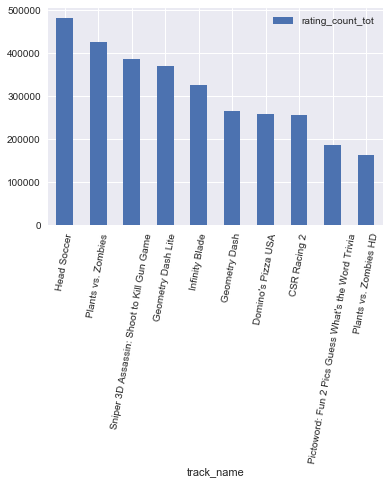

In [15]:
#Can we visualize?
apps_fives.sort_values('rating_count_tot', ascending=0).head(10).plot.bar('track_name', 'rating_count_tot')
plt.xticks(rotation=80)
plt.show()

## Some app names are really long, so I tried to handle this by rotating the X labels, but they don't really line up properly.  For now, I could change the chart type to barh, but I'm certain there has to be a way to align the X labels better.

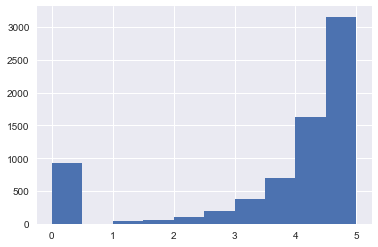

In [16]:
app.user_rating.hist()

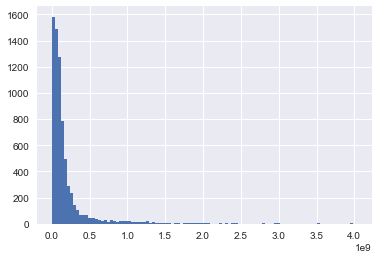

In [17]:
app.size_bytes.hist(bins=100)
#Most apps seem to be small

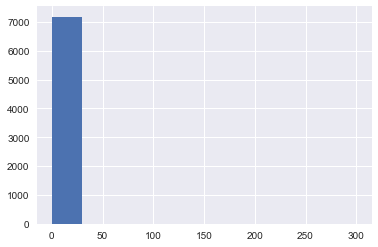

In [18]:
app['price'].hist()
#the below looks weird, as though there are some really expensive apps in there--I didn't expect the 
#X range to go all the way out to 300

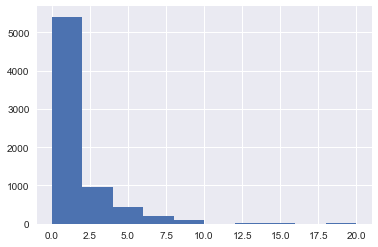

In [19]:
app_20 = app[app.price<20]
app_20['price'].hist()

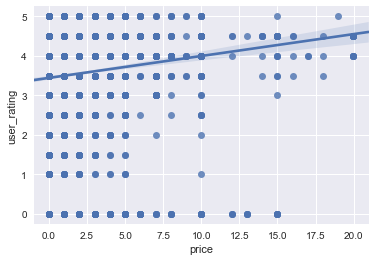

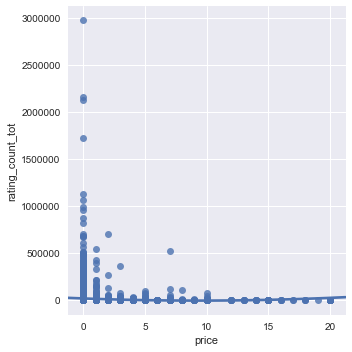

In [37]:
#Is there a relationship between price and rating?  What about between price and number of ratings?
#I'll use both reglot and lmplot, since they're similar.
sns.regplot('price','user_rating', data=app_20)
sns.lmplot('price', 'rating_count_tot', data=app_20)

## It looks like there is a mild positive trend between price and average rating, but most of the data doesn't seem to be described by the line.

## It looks like there is a downward curving relationship between price and the number of ratings, but I don't know enough math or seaborne to get the library to calculate the curve.

In [1]:
#how many apps per genre are there?  Can I figure out how to show it both in text (groupby) and visually (countplot)?
genre_count = app[['id','prime_genre']].groupby(app['prime_genre']).count().sort_values('prime_genre',ascending=False).head(5)
#genre_count.index

NameError: name 'app' is not defined

# Wow, that's a lot of games!

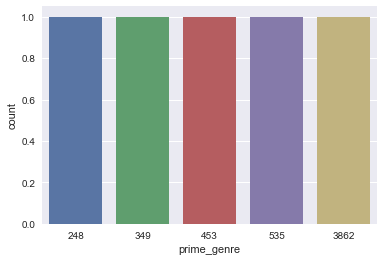

In [100]:
sns.countplot(genre_count.prime_genre)
#Not sure why the above isn't working.  The counts are being displayed as the X ticks.  I can get the count plot to work 
#correctly using the code in the next cell, but obviously there're too many categories for this graph to be meaningful.  

#I ended up finding a solution that worked in the third cell, but I only kind of understand why it works.  

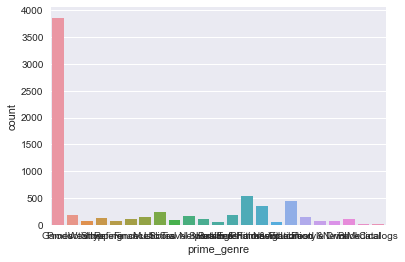

In [101]:
sns.countplot(app.prime_genre)

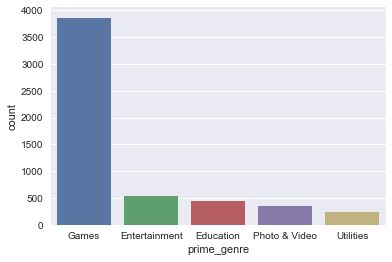

In [109]:
sns.countplot(x = app.prime_genre, order=genre_count.prime_genre.index)

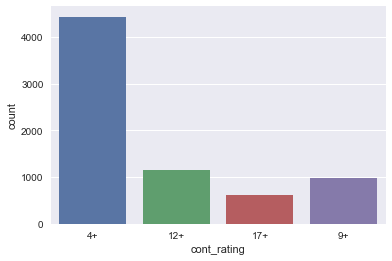

In [135]:
sns.countplot('cont_rating', data=app) #This was a whole lot easier than the above countplot.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


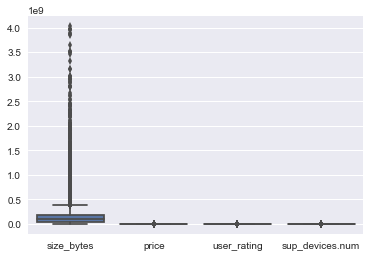

In [172]:
app_stats = app[['track_name', 'size_bytes', 'price', 'user_rating', 'sup_devices.num']]
sns.boxplot(app_stats)

# The size_bytes values totally mess up the scale of this figure, so I'm going to try again without that column (I'm going to drop it, rather than altering the code above creating the app_stats dataframe).

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


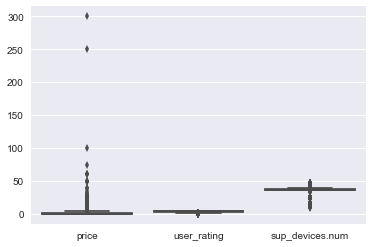

In [173]:
app_stats = app_stats.drop('size_bytes', axis=1)
sns.boxplot(app_stats)

# hm... that didn't seem to solve the problem.  I know the correct solution is to create separate plots for each of the numeric values (either by using the sns facetgrid or plt.subplots), but I can't figure out how to do it in a single plot.

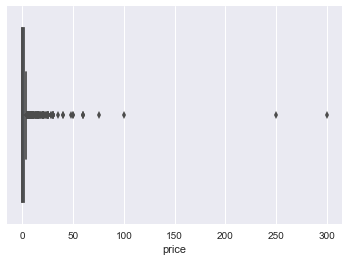

In [174]:
sns.boxplot('price', data=app)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


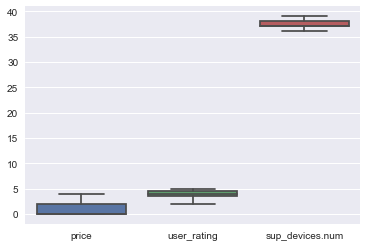

In [175]:
#So the outliners really just mess everything up.  I decided to just figure out how to remove them.
sns.boxplot(app_stats, showfliers=False)

#  Wow, so I guess I have to turn off the display of outliers AND plot only a single variable (or somehow transform the data so that mutiple variables can be shown on a single set of axes, which is outside the scope of my current knowledge)

# I wanted to use boxplots as an alternative way of looking at distributions of multiple numeric variables, but it looks like that doesn't work (for this dataset at least, with its wonky scales).  Below I decided to try various examples of boxplot as it is probably more commonly used--to show the distribution of a numeric value across different categories.

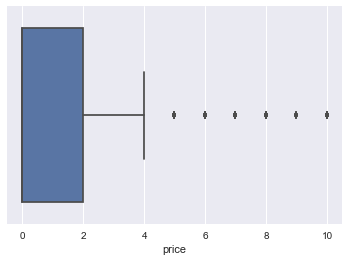

In [198]:
sns.boxplot(app[app['price']<10]['price'])

In [186]:
app.groupby('cont_rating').user_rating.describe()

,count,mean,std,min,25%,50%,75%,max
cont_rating,,,,,,,,
12+,1155.0,3.566667,1.528574,0.0,3.5,4.0,4.5,5.0
17+,622.0,2.760450,1.901693,0.0,0.0,3.5,4.5,5.0
4+,4433.0,3.570156,1.449915,0.0,3.5,4.0,4.5,5.0
9+,987.0,3.769504,1.383697,0.0,4.0,4.5,4.5,5.0


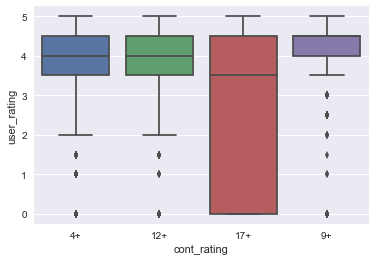

In [199]:
sns.boxplot('cont_rating', 'user_rating', data=app)

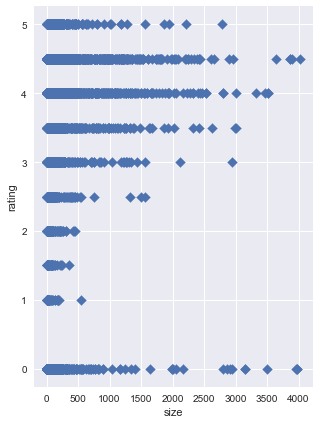

In [187]:
# While I would likely use regplot more often than scatter, the assignment wants me to show a scatter, so here is 
# size plotted against user rating with some customization added.

megabytes = app.size_bytes/1000000

plt.figure(figsize = (5,7))
ax = plt.subplot(111)
ax.scatter(megabytes, app.user_rating, marker="D")
ax.set_xlabel('size')
ax.set_ylabel('rating')

# I stand corrected, the above was more interesting than I thought it would be.  While apps with an average rating of 0 span all sizes, there seems to be a positive relationship between size/rating when the 0s are excluded

* Note, I had to convert size_bytes to a unit with a smaller range otherwise  the numbers for the X axis didn't really make any sense.  I wasn't sure how else to fix that.  I played around with "plt.xlim", but wasn't able to make that work. 